In [52]:
import cv2
import numpy as np
from google. colab. patches import cv2_imshow
import os

In [53]:
class ImageToCartoonConverter():
  def __init__(self, img):
    self.img = img

  def get_image_edge(self, img):
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      median_gray = cv2.medianBlur(gray, 5)
      gray_edge = cv2.adaptiveThreshold(median_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
      return gray_edge

  def edge_to_cartoon(self, img, edge):
      color = cv2.bilateralFilter(img, 9, 250, 250)
      cartoon_img = cv2.bitwise_and(color, color, mask=edge)
      return cartoon_img

  def convert(self):
    edge = self.get_image_edge(self.img)
    cartoon_img = self.edge_to_cartoon(self.img, edge)
    return cartoon_img

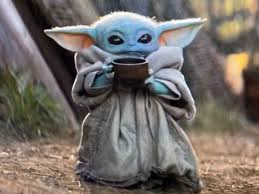

In [54]:
img = cv2.imread('/content/image.jpg')
cv2_imshow(img)

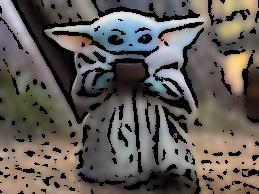

In [55]:
convertor = ImageToCartoonConverter(img)
cartoon = convertor.convert()
cv2_imshow(cartoon)

#Reference:
pythonadvisor